In [1]:
import pandas as pd
from PIL import Image
import io
import ast
import cv2
import numpy as np
import random
from tqdm import tqdm
import nltk
from nltk.translate.bleu_score import corpus_bleu

In [3]:
df = pd.read_csv("archive/train.csv")

In [4]:
df.describe()

,filename,captions,image
count,8734,8734,8734
unique,8734,7018,8734
top,rsicd_images/airport_1.jpg,['Many green buildings and trees are located i...,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
freq,1,92,1


In [5]:
df.head()

,filename,captions,image
0,rsicd_images/airport_1.jpg,['Many aircraft are parked next to a long buil...,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
1,rsicd_images/airport_10.jpg,['some planes are parked in an airport.'\n 'th...,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
2,rsicd_images/airport_100.jpg,['Many aircraft are parked in an airport near ...,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
3,rsicd_images/airport_101.jpg,['Many aircraft are parked near a large buildi...,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
4,rsicd_images/airport_102.jpg,['several buildings and green trees are around...,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...


In [6]:
def bytes_to_image_pil(byte_data):
    image = Image.open(io.BytesIO(byte_data))
    return image

In [7]:
def rotate_image(input_path, output_path, degrees):
    # Open the image file
    with Image.open(input_path) as img:
        # Rotate the image
        rotated_img = img.rotate(degrees, expand=True)
        
        # Save the rotated image
        rotated_img.save(output_path)

In [8]:
random.randint(1,90)

43

In [9]:
chr(65)

'A'

# making train data

In [10]:
a = ["asd","dfg"]
"asd" in a

True

In [12]:
data_df = pd.DataFrame()
data_list = []
capt_file = "rsicd_caption/"
for row in tqdm(df.values):
    file = row[0]
    list_cap = ast.literal_eval(row[1])[0].split('.')
    result_image_pil = bytes_to_image_pil(ast.literal_eval(row[2])["bytes"])
    result_image_pil.save(file)
    
    tag = file.split("/")[1].split("_")[0]
    inif = False
    for i in list_cap:
        if tag in i.split(" "):
            data_list.append([file,i])
            inif = True
            break;
    if(inif == False):
        data_list.append([file,list_cap[0]])
#     si = len(list_cap)
#     if(len(list_cap)>25):
#         si = 26
    
    
#     for i in range(1,si):
#         deg = random.randint(10,90)
        
#         file1 = file.split(".")[0]+chr(64+i)+".jpg"
# #         print(file1)
#         img1 = rotate_image(file,file1,deg)
#         data_list.append([file1,list_cap[i]])
        
        
        
        
        
    

    
    

100%|█████████████████████████████████████████████████████████████████████████████| 8734/8734 [00:54<00:00, 159.43it/s]


In [13]:
data_df = pd.DataFrame(data_list,columns = ["image","captions"])

In [15]:
data_df

,image,captions
0,rsicd_images/airport_1.jpg,Many aircraft are parked next to a long buildi...
1,rsicd_images/airport_10.jpg,some planes are parked in an airport
2,rsicd_images/airport_100.jpg,Many aircraft are parked in an airport near ma...
3,rsicd_images/airport_101.jpg,Many aircraft are parked near a large building...
4,rsicd_images/airport_102.jpg,some planes are parked near an airport with pa...
...,...,...
8729,rsicd_images/00914.jpg,the majestic polygonal baseball field can cont...
8730,rsicd_images/00915.jpg,the baseball field is near the residential are...
8731,rsicd_images/00916.jpg,"on the side of the road, there are two basebal..."
8732,rsicd_images/00918.jpg,this is a huge baseball field decorated with l...


In [16]:
data_df = data_df[data_df["captions"]!=""]

In [17]:
data_df.to_csv("final_df")

In [18]:
data_df = pd.read_csv("final_df")

In [19]:
data_df.head()

,Unnamed: 0,image,captions
0,0,rsicd_images/airport_1.jpg,Many aircraft are parked next to a long buildi...
1,1,rsicd_images/airport_10.jpg,some planes are parked in an airport
2,2,rsicd_images/airport_100.jpg,Many aircraft are parked in an airport near ma...
3,3,rsicd_images/airport_101.jpg,Many aircraft are parked near a large building...
4,4,rsicd_images/airport_102.jpg,some planes are parked near an airport with pa...


# making validation data

In [20]:
df = pd.read_csv("archive/valid.csv")

In [21]:
df.describe()

,filename,captions,image
count,1094,1094,1094
unique,1094,967,1094
top,rsicd_images/airport_61.jpg,['many pieces of agricultural land are togethe...,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
freq,1,13,1


In [22]:
df.head()

,filename,captions,image
0,rsicd_images/airport_61.jpg,['the asphalted and airport runways divide the...,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
1,rsicd_images/airport_62.jpg,['Many white planes are parked at the airport....,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
2,rsicd_images/airport_63.jpg,['a parking apron with an airplane parked on a...,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
3,rsicd_images/airport_64.jpg,['a ploygon terminal is built between a square...,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
4,rsicd_images/airport_65.jpg,['the ploygon terminal is built near the road ...,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...


In [23]:
ast.literal_eval(df["captions"][0])[0].split(".")

['the asphalted and airport runways divide the field into several rounded rectangles arranged next to which buildings and a road are located',
 'the tarmac and airport runways divide the field into several orderly arranged rounded rectangles  next to which is buildings and a road ',
 'a brown ground divided by the grey runway ',
 'we can see a simple termial building and an apron connceted with runways ',
 'some building with a parking lot are near an airport with several runways ',
 '']

In [28]:
data_df = pd.DataFrame()
data_list = []
capt_file = "rsicd_caption/"
for row in tqdm(df.values):
    file = "validation/" + row[0]
    list_cap = ast.literal_eval(row[1])[0].split('.')
    result_image_pil = bytes_to_image_pil(ast.literal_eval(row[2])["bytes"])
    result_image_pil.save(file)
    
    tag = file.split("/")[2].split("_")[0]
    inif = False
    for i in list_cap:
        if tag in i.split(" "):
            data_list.append([file,i])
            inif = True
            break;
    if(inif == False):
        data_list.append([file,list_cap[0]])
#     si = len(list_cap)
#     if(len(list_cap)>25):
#         si = 26
    
    
#     for i in range(1,si):
#         deg = random.randint(10,90)
        
#         file1 = file.split(".")[0]+chr(64+i)+".jpg"
# #         print(file1)
#         img1 = rotate_image(file,file1,deg)
#         data_list.append([file1,list_cap[i]])

100%|█████████████████████████████████████████████████████████████████████████████| 1094/1094 [00:06<00:00, 168.57it/s]


In [29]:
df_valid = pd.DataFrame(data_list,columns=["image","captions"])

In [30]:
df_valid.head()

,image,captions
0,validation/rsicd_images/airport_61.jpg,the asphalted and airport runways divide the f...
1,validation/rsicd_images/airport_62.jpg,Many white planes are parked at the airport
2,validation/rsicd_images/airport_63.jpg,the airport is between a runway and the farmin...
3,validation/rsicd_images/airport_64.jpg,three planes are near a white building in an a...
4,validation/rsicd_images/airport_65.jpg,the ploygon terminal is built near the road an...


In [31]:
df_valid = df_valid[df_valid["captions"]!=""]

In [32]:
df_valid.to_csv("final_valid")

In [33]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import array
import matplotlib.pyplot as plt
%matplotlib inline

import string
import cv2
import os
import glob
from PIL import Image
from time import time

from tensorflow.keras import Input, layers
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM, Embedding, Dense, Activation, Flatten, Reshape, Dropout
# from tensorflow.keras.layers.wrappers import Bidirectional
# from tensorflow.keras.layers.merge import add
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import resnet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
import re
from sklearn.model_selection import train_test_split
import pickle

In [34]:
def preprocess(datas):
    return_data = []
    for data in datas:
        data=data.lower()
        data=data.replace('\\r','').replace('\\n','').replace('\\',' ').replace("n\'t",' not').replace(',',' ')\
        .replace('.',' ').replace('%',' ').replace("'s",' is').replace('-',' ').replace('"','').replace('_','').replace(':','')\
        .replace(';','').replace('!','').replace('!!','').replace(';','').replace('/',' ').replace('?',' ')

        p = re.compile('[0-9]+')
        data=p.sub('', data)

        data = re.sub(r"won't", "will not", data)
        data = re.sub(r"can\'t", "can not", data)

        # general
        data = re.sub(r"n\'t", " not", data)
        data = re.sub(r"\'re", " are", data)
        data = re.sub(r"\'s", " is", data)
        data = re.sub(r"\'d", " would", data)
        data = re.sub(r"\'ll", " will", data)
        data = re.sub(r"\'t", " not", data)
        data = re.sub(r"\'ve", " have", data)
        data = re.sub(r"\'m", " am", data)

#         data = ' '.join(e for e in data.split() if e.lower() not in stopwords)
        # data=data.lower()
        data=' '.join(data.split())
        return_data.append(data)
        
    return return_data

In [49]:
data_df = pd.read_csv("final_df")
df_valid = pd.read_csv("final_valid")

data_df = data_df.sample(frac=1)
df_valid = df_valid.sample(frac=1)

In [50]:
df_valid[df_valid["image"] == "validation/rsicd_images/industrial_86.jpg"]

,Unnamed: 0,image,captions
429,429,validation/rsicd_images/industrial_86.jpg,many green plants with industrial beside in it


In [51]:
df_valid.head()

,Unnamed: 0,image,captions
282,282,validation/rsicd_images/denseresidential_71.jpg,residential building is white
853,853,validation/rsicd_images/sparseresidential_72.jpg,road on both sides of verdant lawns
874,874,validation/rsicd_images/sparseresidential_91.jpg,It's a house in the middle
512,512,validation/rsicd_images/mountain_79.jpg,covers an area of a large mountain range
648,648,validation/rsicd_images/pond_63.jpg,on the ground with an irregular shape of the pond


In [48]:
data_df = data_df.iloc[1:100,:]
df_valid = df_valid.iloc[1:100,:]

In [52]:
data_df['captions']=preprocess(data_df['captions'].values)

In [53]:
data_df.head()

,Unnamed: 0,image,captions
5624,5624,rsicd_images/railwaystation_133.jpg,many buildings and several ponds with green tr...
1317,1317,rsicd_images/center_136.jpg,several buildings are close to a white oval bu...
1743,1743,rsicd_images/commercial_16.jpg,many buildings are located in a commercial area
4586,4586,rsicd_images/parking_320.jpg,many cars are in a parking lot near some green...
7386,7386,rsicd_images/storagetanks_15.jpg,two rows of storage tanks and several others a...


In [54]:
data_df['enc_input'] = 'SOS '+data_df['captions']
data_df['enc_output'] = data_df['captions']+' EOS'

df_valid['enc_input'] = 'SOS '+df_valid['captions']
df_valid['enc_output'] = df_valid['captions']+' EOS'

In [55]:
df_valid.head()

,Unnamed: 0,image,captions,enc_input,enc_output
282,282,validation/rsicd_images/denseresidential_71.jpg,residential building is white,SOS residential building is white,residential building is white EOS
853,853,validation/rsicd_images/sparseresidential_72.jpg,road on both sides of verdant lawns,SOS road on both sides of verdant lawns,road on both sides of verdant lawns EOS
874,874,validation/rsicd_images/sparseresidential_91.jpg,It's a house in the middle,SOS It's a house in the middle,It's a house in the middle EOS
512,512,validation/rsicd_images/mountain_79.jpg,covers an area of a large mountain range,SOS covers an area of a large mountain range,covers an area of a large mountain range EOS
648,648,validation/rsicd_images/pond_63.jpg,on the ground with an irregular shape of the pond,SOS on the ground with an irregular shape of t...,on the ground with an irregular shape of the p...


In [56]:
X_train = data_df[['image','enc_input']]
y_train = data_df['enc_output']

X_test = df_valid[['image','enc_input']]
y_test = df_valid['enc_output']

In [57]:
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.22, random_state=42)

In [58]:
X_train

,image,enc_input
5624,rsicd_images/railwaystation_133.jpg,SOS many buildings and several ponds with gree...
1317,rsicd_images/center_136.jpg,SOS several buildings are close to a white ova...
1743,rsicd_images/commercial_16.jpg,SOS many buildings are located in a commercial...
4586,rsicd_images/parking_320.jpg,SOS many cars are in a parking lot near some g...
7386,rsicd_images/storagetanks_15.jpg,SOS two rows of storage tanks and several othe...
...,...,...
2490,rsicd_images/desert_285.jpg,SOS a piece of sand in the desert is like the ...
1948,rsicd_images/commercial_344.jpg,SOS there are many large buildings on the ground
3277,rsicd_images/industrial_330.jpg,SOS industrial houses on the street are well d...
7093,rsicd_images/square_35.jpg,SOS there are plenty of grey roof houses next ...


In [59]:
y_train.values

array(['many buildings and several ponds with green trees are located on both sides of a railway station EOS',
       'several buildings are close to a white oval building near a crossroads EOS',
       'many buildings are located in a commercial area EOS', ...,
       'industrial houses on the street are well disposed EOS',
       'there are plenty of grey roof houses next to the square EOS',
       'some buildings and green plants are located in an average residential area EOS'],
      dtype=object)

In [60]:
tokenizer1 = Tokenizer()
tokenizer1.fit_on_texts(y_train.values+' '+X_train['enc_input'].values)

In [12]:
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer1 = pickle.load(handle)

In [61]:
len_of_captions = [len(i.split()) for i in X_train['enc_input'].values]

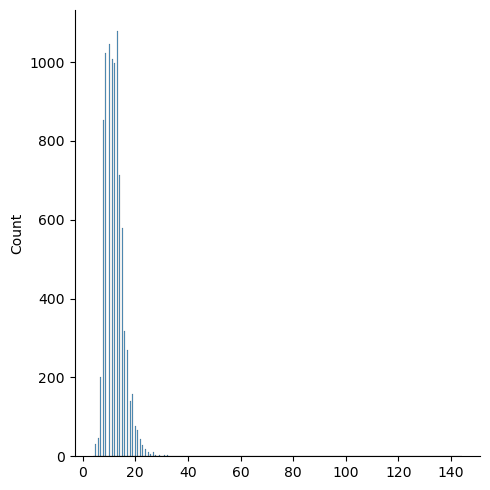

In [62]:
sns.displot(len_of_captions)

In [63]:
vocab_size = len(tokenizer1.index_word)
vocab_size

1656

In [64]:
embeddings_index = dict()
f = open('F:\Data Science\data\glove.6B.100d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [65]:
eng_inp_vocab_size=max(tokenizer1.index_word.keys())
embedding_matrix = np.zeros((eng_inp_vocab_size+1, 100))
for word, i in tokenizer1.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [66]:
np.save("embedding_matrix.npy",embedding_matrix)

In [68]:
import pickle
with open('tokenizer_s.pickle', 'wb') as handle:
    pickle.dump(tokenizer1, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [69]:
class Dataset:
    def __init__(self, data, embedding, tokenizer_eng, max_len, vocab_size):
        self.decoder_inps = data[0]['enc_input'].values
        self.images = data[0]['image'].values
#         self.decoder_inps = data['decoder_input_hin'].values
        self.decoder_outs = data[1].values
        self.embedding = embedding
#         self.embedding1 = embedding1
        self.tknizer_eng = tokenizer_eng
#         self.tknizer_hin_inp = tokenizer_hin_inp
#         self.tknizer_hin = tokenizer_hin
        self.max_len = max_len
        self.vocab_size=vocab_size

    def __getitem__(self, i):
        
        img = cv2.imread(self.images[i])
        img = cv2.resize(img,(224,224),interpolation=cv2.INTER_AREA)
        img = img/255.0
        
        self.decoder_seq = self.tknizer_eng.texts_to_sequences([self.decoder_inps[i]]) # need to pass list of values
#         self.decoder_inp_seq = self.tknizer_hin_inp.texts_to_sequences([self.decoder_inps[i]])
        self.decoder_out_seq = self.tknizer_eng.texts_to_sequences([self.decoder_outs[i]])
#         print(self.decoder_inp_seq)
        self.decoder_seq = pad_sequences(self.decoder_seq, maxlen=self.max_len, dtype='int32', padding='post')
        self.decoder_out_seq = pad_sequences(self.decoder_out_seq, maxlen=self.max_len, dtype='int32', padding='post')
#         self.decoder_out_seq = pad_sequences([self.decoder_inp_seq[0][1:]], maxlen=25, dtype='int32', padding='post')
        #print(self.decoder_inp_seq1)
#         print(self.decoder_seq)
#         print(self.decoder_out_seq)
        #print(self.encoder_seq)
        self.decoder_seq1=[]
        for j in self.decoder_seq[0]:
            self.decoder_seq1.append(self.embedding[j])
            
            
#         self.decoder_out_seq1=[]
#         for i in self.decoder_out_seq[0]:
#             self.decoder_out_seq1.append(self.embedding[i])    
        #print(np.array(encoder_seq1).shape)
        
#         decoder_inp_seq1 =[]
        
#         for i in self.decoder_inp_seq[0]:
#             decoder_inp_seq1.append(self.embedding1[i])
            
#         self.decoder_out_seq1 = np.zeros((25,self.vocab_hindi+1),dtype=np.float32)
        
#         for i,d in enumerate(self.decoder_out_seq[0]):
#             self.decoder_out_seq1[i,d]=1
        
        
        
        #print(self.encoder_seq.shape)
#         print(img)
        return np.array(img), np.array(self.decoder_seq1), np.array(self.decoder_out_seq)

    def __len__(self): # your model.fit_gen requires this function
        return len(self.encoder_inps)

    
class Dataloder(tf.keras.utils.Sequence):    
    def __init__(self, dataset, batch_size=1):
        #print(dataset)
        self.dataset = dataset
        self.batch_size = batch_size
        self.indexes = np.arange(len(self.dataset.decoder_inps))
        #print(self.indexes)


    def __getitem__(self, i):
        #print(i,'in dataloader')
        start = i * self.batch_size
        stop = (i + 1) * self.batch_size
        data = []
        for j in range(start, stop):
            #print(self.dataset[j])
            data.append(self.dataset[j])
            #break
        #print(len(data),'in dataloader')
        batch = [np.stack(samples, axis=0) for samples in zip(*data)]
#         print('batch')
        #print(batch[2].shape)
        # we are creating data like ([italian, english_inp], english_out) these are already converted into seq
        return tuple([[batch[0],batch[1]],tf.squeeze(batch[2])])

    def __len__(self):  # your model.fit_gen requires this function
        return len(self.indexes) // self.batch_size

    def on_epoch_end(self):
        self.indexes = np.random.permutation(self.indexes)

In [70]:
train_dataset = Dataset((X_train,y_train), embedding_matrix, tokenizer1, 20,vocab_size)
test_dataset  = Dataset((X_test,y_test), embedding_matrix, tokenizer1,20,vocab_size)

train_dataloader = Dataloder(train_dataset, batch_size=32)
test_dataloader = Dataloder(test_dataset, batch_size=32)

In [71]:
len(test_dataloader[3][1][0])

20

In [24]:
base_model = VGG16(
    include_top=False,
    weights="imagenet",
    input_tensor=layers.Input((224,224,3)),
)

TypeError: Keras symbolic inputs/outputs do not implement `__len__`. You may be trying to pass Keras symbolic inputs/outputs to a TF API that does not register dispatching, preventing Keras from automatically converting the API call to a lambda layer in the Functional Model. This error will also get raised if you try asserting a symbolic input/output directly.

In [72]:
# input_sizes = 224
# base_model = tf.keras.applications.ResNet50(input_shape=(input_sizes,input_sizes,3),include_top=False,weights='imagenet')
# base_model.trainable=False

In [73]:
# f1,f2,f3,f4=None,None,None,None
# for layer in base_model.layers:
#     layer.trainable=False
#     # print(layer.name)
#     if layer.name=='pool1_pool':
#         f1=layer.output
#     if layer.name=='conv3_block1_1_conv':
#         f2=layer.output
#     if layer.name=='conv4_block1_1_conv':
#         f3=layer.output
#     if layer.name=='conv5_block3_2_conv':
#         f4=layer.output
# #     if layer.name=='block5_pool':
# #         f5=layer.output

In [74]:
f4.shape

TensorShape([None, 7, 7, 512])

In [30]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [23]:
base_model.trainable = False

In [76]:
inp = layers.Input(shape = (224,224,3))
x = base_model.output
# print(x.shape)

# feat_fr_ = base_model.layers[-5]
# print(feat_fr_.shape)
flat = layers.Flatten()(x)

dense1 = layers.Dense(1024,activation='relu')(flat)

dense2 = layers.Dense(512,activation='relu')(flat)
dense3 = layers.Dense(100,activation='relu')(dense2)

# r_v1 = layers.RepeatVector(20)(dense3)

decoder_inputs = tf.keras.Input(shape=(20,100))

# decoder_lstm = keras.layers.LSTM(64, return_sequences=True, return_state=True)

decoder_lstm = tf.keras.layers.LSTM(1024, return_sequences=True, return_state=True)
add1 = layers.add([dense3,decoder_inputs])
print(add1.shape)
decoder_outputs, _, _ = decoder_lstm(add1)
decoder_dense = tf.keras.layers.Dense(vocab_size+1, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)


model = tf.keras.Model([base_model.input, decoder_inputs], decoder_outputs)

# conv1 = layers.Conv2D(64,3,2,padding='same',activation='relu')(inp)
# print(conv1.shape)
# conv2 = layers.Conv2D(32,3,padding='valid',activation='relu')(conv1)
# print(conv2.shape)
# conv3 = layers.Conv2D(64,3,padding='same',activation='relu')(conv2)
# print(conv3.shape)

# ##---------residual---------------
# maxp1 = layers.MaxPooling2D(3,2,padding='valid')(conv3)
# print(maxp1.shape)
# conv4 = layers.Conv2D(96,3,2,padding='valid',activation='relu')(conv3)
# print(conv4.shape)
# concat1 = layers.Concatenate(axis=3)([maxp1,conv4])
# print(concat1.shape)
# ##--------------end-residual

(None, 20, 100)


In [77]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\vishwas
[nltk_data]     upadhyaya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
# tf.enable_eager_execution()

In [43]:
class BLEUCallback():
    def __init__(self, reference_data, candidate_model, tokenizer, sequence_length):
        super(BLEUCallback, self).__init__()
        self.reference_data = reference_data
        self.candidate_model = candidate_model
        self.tokenizer = tokenizer
        self.sequence_length = sequence_length
    
    
#     def set_model(self, model):
#         self.model = model


    def predict_captions(self,image):
        start_word = ["sos"]
        c=0
        while True:
            par_caps = [tokenizer1.word_index[i] for i in start_word]
    #         print(np.array(par_caps).shape)
            par_caps = pad_sequences([par_caps], maxlen=20, padding='post')
    #         print(np.array(par_caps).shape)
            par_caps = [embedding_matrix[i,:] for i in par_caps]
    #         print(np.array(par_caps).shape)
            preds = self.candidate_model.predict([np.array([image]), np.array(par_caps)])
#             print(preds[0],"hiii")
    #         print(np.sum(preds[0][c]))
    #         if c!=1:
            word_pred = self.tokenizer.index_word[np.argmax(preds[0][c])]
    #         else:
    #             word_pred = 'a'
            start_word.append(word_pred)
            c+=1

            if word_pred == "eos" or len(start_word) > 20:
                break

        return ' '.join(start_word[1:-1])
    
    def on_epoch_end(self, epoch, logs=None):
        # Generate predictions using the candidate model
        print("in epoch end")
        predictions = []
        reference = []
        
        for i in range(len(self.reference_data)):
            for j in range(1):
                Argmax_Search = self.predict_captions(self.reference_data[i][0][0][j])
#                 print(self.reference_data[i][0][0][j].shape)
#                 print(self.reference_data[i][0][0][j]*255.0)
#                 plt.imshow(self.reference_data[i][0][0][j])
#                 plt.show()
                
#                 cv2.waitKey(0) # wait for any key to exit window
#                 cv2.destroyAllWindows()
                predictions.append(Argmax_Search)
#                 print(Argmax_Search)
#                 print(self.reference_data[i][1][j].numpy())
                reference_texts = self.sequence_to_text(self.reference_data[i][1][j].numpy())
#                 print(reference_texts)
                reference.append(reference_texts)
#             if i==2:
#                 break;

        # Convert predictions and references to text
#         predicted_texts = self.sequences_to_texts(predictions)
        
#         reference_texts = self.sequences_to_texts(reference)

        # Calculate BLEU score
        bleu_score = self.calculate_bleu(reference, predictions)

        # Log BLEU score
        print(f'\nBLEU score: {bleu_score}')
#         logs['bleu_score'] = bleu_score
        
        print(bleu_score)
        
        return bleu_score

    def sequences_to_texts(self, sequences):
        texts = []
        for sequence in sequences:
            text = self.sequence_to_text(sequence)
            texts.append(text)
        return texts

    def sequence_to_text(self, sequence):
#         print(self.tokenizer.index_word[5])
#         for token in sequence:
#             if token != 0:
#                 print(self.tokenizer.index_word[token])
        tokens = [self.tokenizer.index_word[token] for token in sequence if token != 0]
        text = ' '.join(tokens)
        return text

    def calculate_bleu(self, references, candidates):
        reference_list = [ref.split() for ref in references]
        candidate_list = [cand.split() for cand in candidates]
        return corpus_bleu(reference_list, candidate_list)

In [28]:
# tokenizer1.texts_to_sequences(df_valid["enc_input"])
pad_sequences([[1,2],[3]],5)

array([[0, 0, 0, 1, 2],
       [0, 0, 0, 0, 3]])

In [29]:
# x_bl = tf.convert_to_tensor(pad_sequences(tokenizer1.texts_to_sequences(df_valid["enc_input"]),maxlen=20, dtype='int32', padding='post'))

# y_bl = tf.convert_to_tensor(pad_sequences(tokenizer1.texts_to_sequences(df_valid["enc_output"]),maxlen=20, dtype='int32', padding='post'))

# bleu_callback = BLEUCallback(reference_data=test_dataloader,
#                              candidate_model=model,
#                              tokenizer=tokenizer1,
#                              sequence_length=20)

In [1]:
# adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
# model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=["accuracy"])
# model.fit(train_dataloader, epochs=50, validation_data = test_dataloader)

In [26]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=["accuracy"])
model.fit(train_dataloader, epochs=10, validation_data = test_dataloader)

Epoch 1/10
1364/1364 [==============================] - 786s 566ms/step - loss: 2.4574 - accuracy: 0.5360 - val_loss: 1.5804 - val_accuracy: 0.7004
Epoch 2/10
1364/1364 [==============================] - 499s 366ms/step - loss: 1.7820 - accuracy: 0.6309 - val_loss: 1.4018 - val_accuracy: 0.7219
Epoch 3/10
1364/1364 [==============================] - 558s 409ms/step - loss: 1.5426 - accuracy: 0.6645 - val_loss: 1.3143 - val_accuracy: 0.7393
Epoch 4/10
1364/1364 [==============================] - 677s 496ms/step - loss: 1.4028 - accuracy: 0.6861 - val_loss: 1.2573 - val_accuracy: 0.7429
Epoch 5/10
1364/1364 [==============================] - 423s 310ms/step - loss: 1.3087 - accuracy: 0.6998 - val_loss: 1.2243 - val_accuracy: 0.7501
Epoch 6/10
1364/1364 [==============================] - 431s 316ms/step - loss: 1.2402 - accuracy: 0.7098 - val_loss: 1.2109 - val_accuracy: 0.7513
Epoch 7/10
1364/1364 [==============================] - 431s 316ms/step - loss: 1.1863 - accuracy: 0.7179 - val_

In [27]:
model.fit(train_dataloader, epochs=10, validation_data = test_dataloader)

Epoch 1/10
1364/1364 [==============================] - 747s 548ms/step - loss: 1.0408 - accuracy: 0.7409 - val_loss: 1.1724 - val_accuracy: 0.7554
Epoch 2/10
1364/1364 [==============================] - 674s 494ms/step - loss: 1.0161 - accuracy: 0.7448 - val_loss: 1.1647 - val_accuracy: 0.7582
Epoch 3/10
1364/1364 [==============================] - 480s 352ms/step - loss: 0.9909 - accuracy: 0.7497 - val_loss: 1.1532 - val_accuracy: 0.7593
Epoch 4/10
1364/1364 [==============================] - 428s 313ms/step - loss: 0.9678 - accuracy: 0.7528 - val_loss: 1.1521 - val_accuracy: 0.7603
Epoch 5/10
1364/1364 [==============================] - 436s 319ms/step - loss: 0.9466 - accuracy: 0.7560 - val_loss: 1.1708 - val_accuracy: 0.7560
Epoch 6/10
1364/1364 [==============================] - 415s 304ms/step - loss: 0.9270 - accuracy: 0.7601 - val_loss: 1.1354 - val_accuracy: 0.7669
Epoch 7/10
1364/1364 [==============================] - 415s 304ms/step - loss: 0.9071 - accuracy: 0.7638 - val_

In [ ]:
model.fit(train_dataloader, epochs=10, validation_data = test_dataloader)

In [99]:
# import tensorflow_text
tokenizer1.index_word[100]

'big'

In [44]:
 bleu_callback = BLEUCallback(reference_data=test_dataloader,
                             candidate_model=model,
                             tokenizer=tokenizer1,
                             sequence_length=20)

In [45]:
print(bleu_callback.on_epoch_end(1,logs = None))

in epoch end

BLEU score: 9.865981517585494e-232
9.865981517585494e-232
9.865981517585494e-232


C:\Users\vishwas upadhyaya\anaconda3\envs\tensorflow-gpu\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\vishwas upadhyaya\anaconda3\envs\tensorflow-gpu\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\vishwas upadhyaya\anaconda3\envs\tensorflow-gpu\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps o

In [79]:
bleu_callback.calculate_bleu()

TypeError: calculate_bleu() missing 2 required positional arguments: 'references' and 'candidates'

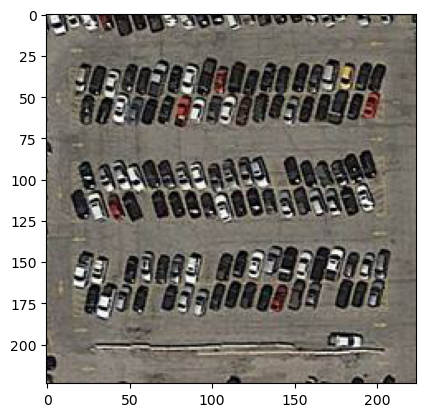

In [105]:
def predict_captions(image):
    start_word = ["sos"]
    c=0
    while True:
        par_caps = [tokenizer1.word_index[i] for i in start_word]
#         print(np.array(par_caps).shape)
        par_caps = pad_sequences([par_caps], maxlen=20, padding='post')
#         print(np.array(par_caps).shape)
        par_caps = [embedding_matrix[i,:] for i in par_caps]
#         print(np.array(par_caps).shape)
        preds = model.predict([np.array([image]), np.array(par_caps)])
#         print(np.sum(preds[0][c]))
#         if c!=1:
        word_pred = tokenizer1.index_word[np.argmax(preds[0][c])]
#         else:
#             word_pred = 'a'
        start_word.append(word_pred)
        c+=1
        
        if word_pred == "eos" or len(start_word) > 20:
            break
            
    return ' '.join(start_word[1:-1])

# id_no = 810
# 'archive/Images/'+X_test['image'].values[id_no]
img = cv2.imread("parking_88.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
img = cv2.resize(img,(224,224),interpolation=cv2.INTER_AREA)
img = img/255.0
Argmax_Search = predict_captions(img)

In [106]:
# print('true: ',y_test.values[id_no])
print('predicted: ',Argmax_Search)

predicted:  many cars are parked in a parking lot


In [63]:
df_valid.values[id_no]

array([167, 'validation/rsicd_images/bridge_81.jpg',
       'Under the bridge there is a boat in the river',
       'SOS Under the bridge there is a boat in the river',
       'Under the bridge there is a boat in the river EOS'], dtype=object)

In [80]:
model.save('model_res50_s.h5')

C:\Users\vishwas upadhyaya\anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [29]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

In [30]:
lite_model=converter.convert()

INFO:tensorflow:Assets written to: C:\Users\VISHWA~1\AppData\Local\Temp\tmpa6k7ccyx\assets


INFO:tensorflow:Assets written to: C:\Users\VISHWA~1\AppData\Local\Temp\tmpa6k7ccyx\assets
C:\Users\vishwas upadhyaya\anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [31]:
open('model.tflite','wb').write(lite_model)

170934548

In [32]:
model_lite = tf.lite.Interpreter(model_path="model.tflite")
model_lite.allocate_tensors()

In [ ]:
# def predict_captions(image):
#     start_word = ["sos"]
#     c=0
#     while True:
#         par_caps = [tokenizer1.word_index[i] for i in start_word]
# #         print(np.array(par_caps).shape)
#         par_caps = pad_sequences([par_caps], maxlen=20, padding='post')
# #         print(np.array(par_caps).shape)
#         par_caps = [embedding_matrix[i,:] for i in par_caps]
# #         print(np.array(par_caps).shape)
#         preds = self.candidate_model.predict([np.array([image]), np.array(par_caps)])
# #             print(preds[0],"hiii")
# #         print(np.sum(preds[0][c]))
# #         if c!=1:
#         word_pred = self.tokenizer.index_word[np.argmax(preds[0][c])]
# #         else:
# #             word_pred = 'a'
#         start_word.append(word_pred)
#         c+=1

#         if word_pred == "eos" or len(start_word) > 20:
#             break

#     return ' '.join(start_word[1:-1])

# def on_epoch_end(epoch, logs=None):
#     # Generate predictions using the candidate model
#     predictions = []
#     reference = []

#     for i in range(len(self.reference_data)):
#         for j in range(16):
#             Argmax_Search = self.predict_captions(reference_data[i][0][0][j])
#             predictions.append(Argmax_Search)
#             reference.append(self.reference_data[i][1][j])

#     # Convert predictions and references to text
# #         predicted_texts = self.sequences_to_texts(predictions)
#     reference_texts = self.sequences_to_texts(reference)

#     # Calculate BLEU score
#     bleu_score = self.calculate_bleu(reference_texts, predictions)

#     # Log BLEU score
#     print(f'\nBLEU score: {bleu_score}')
#     logs['bleu_score'] = bleu_score

# def sequences_to_texts(sequences):
#     texts = []
#     for sequence in sequences:
#         text = self.sequence_to_text(sequence)
#         texts.append(text)
#     return texts

# def sequence_to_text(sequence):
#     tokens = [self.tokenizer.index_word[token] for token in sequence if token != 0]
#     text = ' '.join(tokens)
#     return text

# def calculate_bleu(references, candidates):
#     reference_list = [ref.split() for ref in references]
#     candidate_list = [cand.split() for cand in candidates]
#     return corpus_bleu(reference_list, candidate_list)

In [3]:
model1  = tf.keras.models.load_model('model_vgg16.h5')

In [4]:
model = model1

In [5]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

In [6]:
lite_model=converter.convert()

INFO:tensorflow:Assets written to: C:\Users\VISHWA~1\AppData\Local\Temp\tmpwz_cx2rt\assets


INFO:tensorflow:Assets written to: C:\Users\VISHWA~1\AppData\Local\Temp\tmpwz_cx2rt\assets
C:\Users\vishwas upadhyaya\anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


ResourceExhaustedError: OOM when allocating tensor with shape[25088,4096] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:Fill]

In [ ]:
open('model_vgg.tflite','wb').write(lite_model)